Python Visualizations

In [10]:

# 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Set styles
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

# For reproducibility
np.random.seed(42)


1: Correlation Heatmap with Clustering

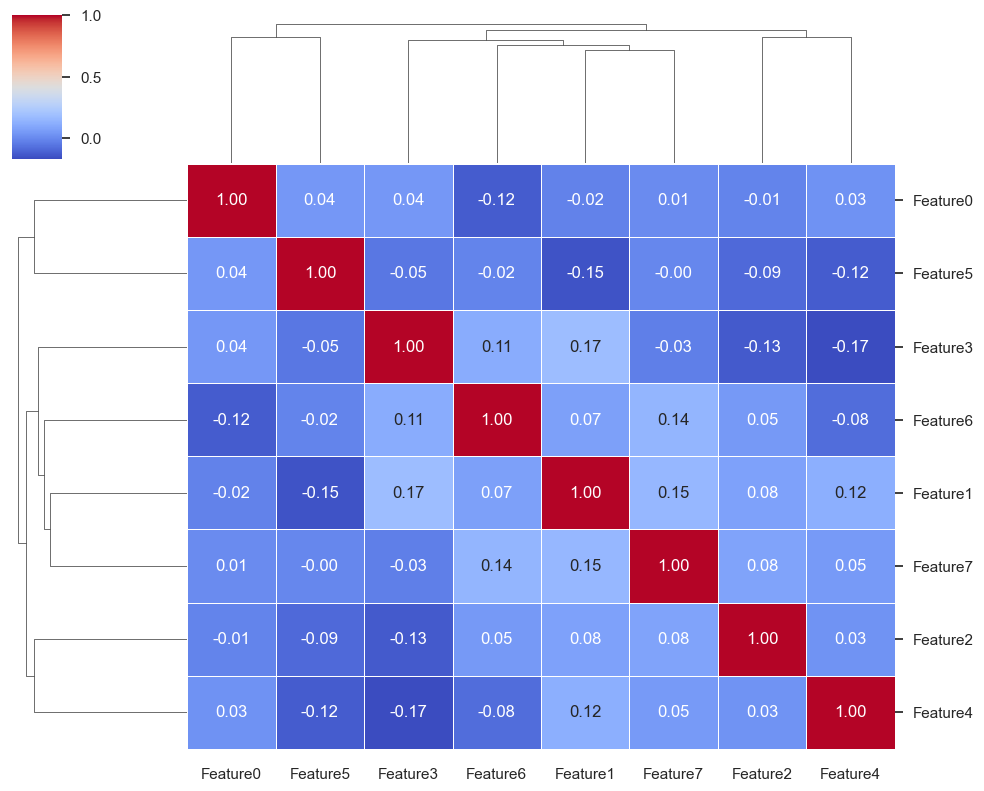

In [2]:
# Create synthetic dataset
df = pd.DataFrame(np.random.randn(100, 8), columns=[f"Feature{i}" for i in range(8)])

# Compute correlation
corr = df.corr()

# Heatmap with clustering
sns.clustermap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, figsize=(10,8))
plt.show()


2: Interactive 3D Scatter Plot

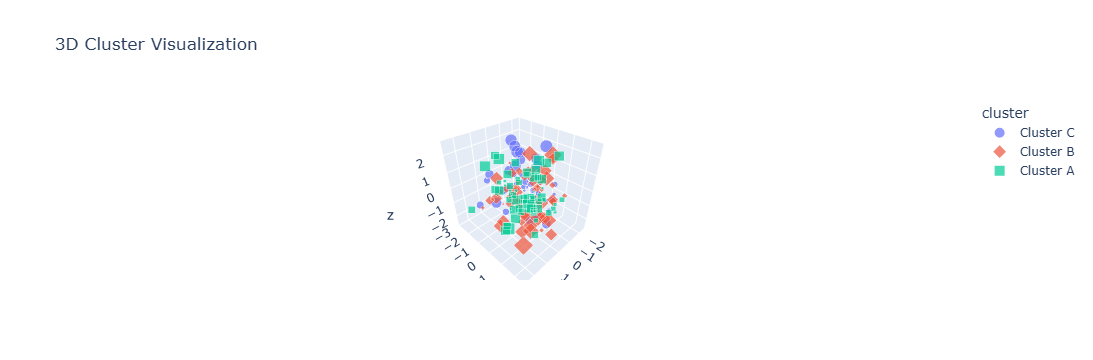

In [3]:
# Generate clustered data
df3d = pd.DataFrame({
    "x": np.random.randn(200),
    "y": np.random.randn(200),
    "z": np.random.randn(200),
    "cluster": np.random.choice(["Cluster A", "Cluster B", "Cluster C"], 200)
})

# 3D scatter plot
fig = px.scatter_3d(df3d, x="x", y="y", z="z", color="cluster",
                    size=np.abs(df3d["z"])*10, opacity=0.7, symbol="cluster",
                    title="3D Cluster Visualization")
fig.show()


3: Animated Line Chart

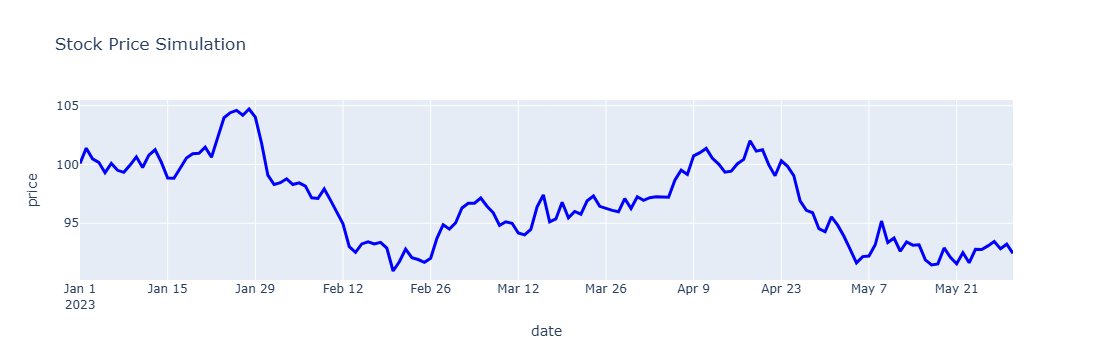

In [4]:
# Simulate stock prices
dates = pd.date_range("2023-01-01", periods=150)
prices = np.cumsum(np.random.randn(150)) + 100
df_stock = pd.DataFrame({"date": dates, "price": prices})

# Animated line chart
fig = px.line(df_stock, x="date", y="price", title="Stock Price Simulation")
fig.update_traces(line=dict(color="blue", width=3))
fig.show()


4: Interactive Geospatial Map (Folium)

In [6]:
import folium
import pandas as pd
import numpy as np

# Generate random lat/lon points around Nairobi
np.random.seed(10)
lat = np.random.uniform(-1.35, -1.25, 40)   # Nairobi latitude range
lon = np.random.uniform(36.75, 36.90, 40)   # Nairobi longitude range
prices = np.random.randint(1000, 10000, 40) # Airbnb-like prices in KES

df_map = pd.DataFrame({"lat": lat, "lon": lon, "price": prices})

# Initialize map centered on Nairobi
m = folium.Map(location=[-1.2921, 36.8219], zoom_start=12)

# Add markers for each listing
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=6,
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: KES {row['price']}"
    ).add_to(m)

# Display map
m



5: Pairplot for Multivariate Analysis

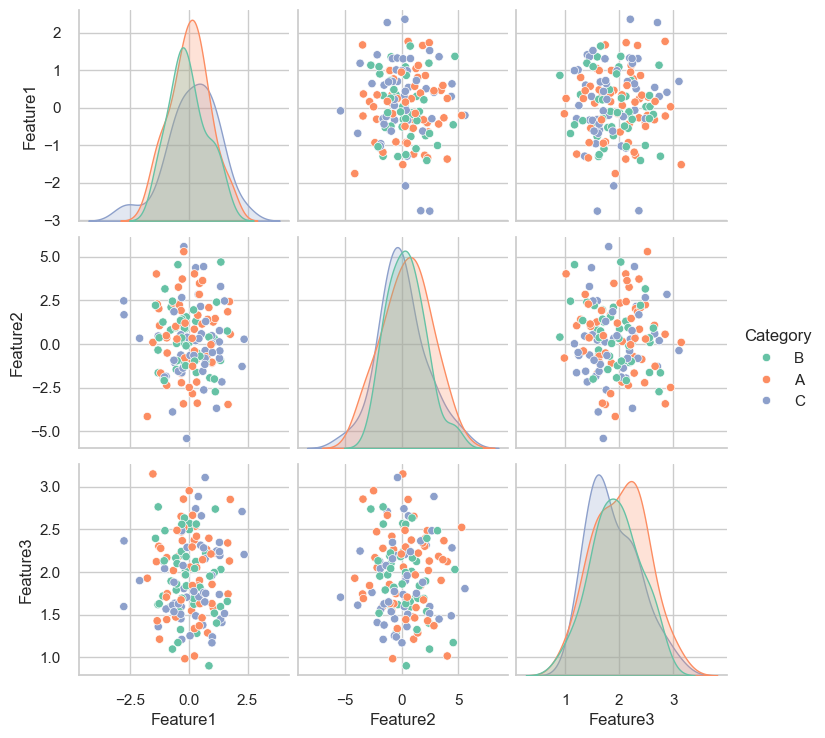

In [7]:
# Generate dataset with labels
df_pair = pd.DataFrame({
    "Feature1": np.random.randn(150),
    "Feature2": np.random.randn(150) * 2,
    "Feature3": np.random.randn(150) * 0.5 + 2,
    "Category": np.random.choice(["A", "B", "C"], 150)
})

# Seaborn pairplot
sns.pairplot(df_pair, hue="Category", palette="Set2", diag_kind="kde")
plt.show()


6: Heatmap of Time Series (Calendar Style)

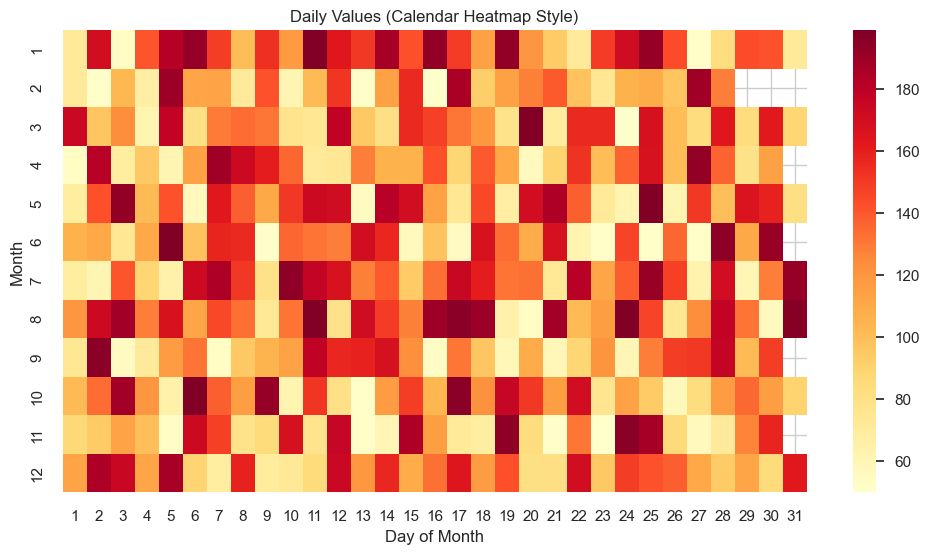

In [9]:
# Create daily time series
dates = pd.date_range("2023-01-01", periods=365)
values = np.random.randint(50, 200, size=365)
df_time = pd.DataFrame({"date": dates, "value": values})
df_time["month"] = df_time["date"].dt.month
df_time["day"] = df_time["date"].dt.day

# Pivot for heatmap (use keyword args)
pivot = df_time.pivot(index="month", columns="day", values="value")

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlOrRd", cbar=True)
plt.title("Daily Values (Calendar Heatmap Style)")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()
